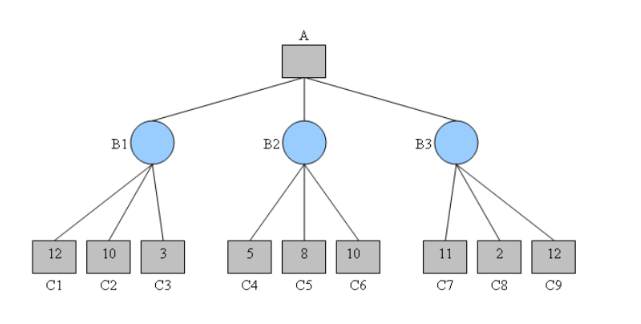

In [12]:
def alpha_beta_search(node, depth_level, alpha_val, beta_val, is_maximizing_player, value_map, pruning_list):
    if depth_level == 2:
        return value_map[node], [node]

    if is_maximizing_player:
        best_value = float('-inf')
        best_path = []
        for child_node in tree_structure[node]:
            child_value, child_route = alpha_beta_search(child_node, depth_level + 1, alpha_val, beta_val, False, value_map, pruning_list)
            if child_value > best_value:
                best_value = child_value
                best_path = [node] + child_route
            alpha_val = max(alpha_val, best_value)
            if beta_val <= alpha_val:
                pruning_list.append((node, child_node))
                break
        return best_value, best_path
    else:
        best_value = float('inf')
        best_path = []
        for child_node in tree_structure[node]:
            child_value, child_route = alpha_beta_search(child_node, depth_level + 1, alpha_val, beta_val, True, value_map, pruning_list)
            if child_value < best_value:
                best_value = child_value
                best_path = [node] + child_route
            beta_val = min(beta_val, best_value)
            if beta_val <= alpha_val:
                pruning_list.append((node, child_node))
                break
        return best_value, best_path

tree_structure = {
    'A': ['B1', 'B2', 'B3'],
    'B1': ['C1', 'C2', 'C3'],
    'B2': ['C4', 'C5', 'C6'],
    'B3': ['C7', 'C8', 'C9']
}

value_map = {
    'C1': 12, 'C2': 10, 'C3': 3,
    'C4': 5, 'C5': 8, 'C6': 10,
    'C7': 11, 'C8': 2, 'C9': 12
}

pruning_list = []
optimal_value, optimal_path = alpha_beta_search('A', 0, float('-inf'), float('inf'), True, value_map, pruning_list)

print("Optimal Value:", optimal_value)
print("Optimal Path:", ' -> '.join(optimal_path))
if pruning_list:
    print("Pruned Nodes:", ', '.join([f"{parent} -> {child}" for parent, child in pruning_list]))
else:
    print("No nodes were pruned.")


Optimal Value: 5
Optimal Path: A -> B2 -> C4
Pruned Nodes: B3 -> C8


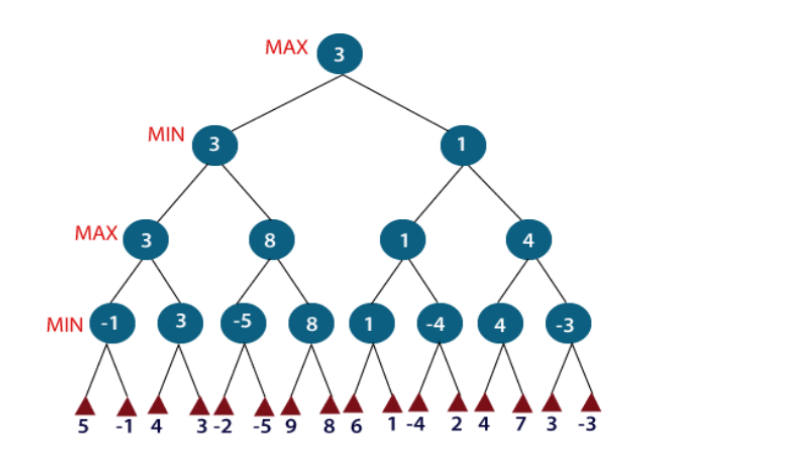

In [15]:
def alpha_beta(curr_node, depth, alpha, beta, is_maximizing, values, path, pruned_nodes):
    if depth == 4:
        return values[curr_node], [curr_node]
    if is_maximizing:
        best_value = float('-inf')
        best_path = []
        for child in tree[curr_node]:
            value, child_path = alpha_beta(child, depth + 1, alpha, beta, False, values, path, pruned_nodes)
            if value > best_value:
                best_value = value
                best_path = [curr_node] + child_path
            alpha = max(alpha, best_value)
            if beta <= alpha:
                pruned_nodes.append((curr_node, child))
                break
        return best_value, best_path
    else:
        best_value = float('inf')
        best_path = []
        for child in tree[curr_node]:
            value, child_path = alpha_beta(child, depth + 1, alpha, beta, True, values, path, pruned_nodes)
            if value < best_value:
                best_value = value
                best_path = [curr_node] + child_path
            beta = min(beta, best_value)
            if beta <= alpha:
                pruned_nodes.append((curr_node, child))
                break
        return best_value, best_path
tree = {
    'A': ['B1', 'B2'],
    'B1': ['C1', 'C2'],
    'B2': ['C3', 'C4'],
    'C1': ['D1', 'D2'],
    'C2': ['D3', 'D4'],
    'C3': ['D5', 'D6'],
    'C4': ['D7', 'D8'],
    'D1': ['E1', 'E2'],
    'D2': ['E3', 'E4'],
    'D3': ['E5', 'E6'],
    'D4': ['E7', 'E8'],
    'D5': ['E9', 'E10'],
    'D6': ['E11', 'E12'],
    'D7': ['E13', 'E14'],
    'D8': ['E15', 'E16'],
}
values = {
    'E1': 5, 'E2': -1, 'E3': 4,
    'E4': 3, 'E5': -2, 'E6': -5,
    'E7': 9, 'E8': 9, 'E9': 6,
    'E10': 1, 'E11': -4, 'E12': 2,
    'E13': 4, 'E14': 7, 'E15': 3, 'E16': -3
}
pruned_nodes = []
optimal_value, optimal_path = alpha_beta('A', 0, float('-inf'), float('inf'), True, values, [], pruned_nodes)

print("Optimal Value:", optimal_value)
print("Optimal Path:", ' -> '.join(optimal_path))
if pruned_nodes:
    print("Pruned Nodes:", ', '.join([f"{parent} -> {child}" for parent, child in pruned_nodes]))
else:
    print("No nodes were pruned.")


Optimal Value: 3
Optimal Path: A -> B1 -> C1 -> D2 -> E4
Pruned Nodes: C2 -> D4, D5 -> E10, D6 -> E11, B2 -> C3
